In [175]:
import os 
import healpy as hp
import numpy as np
import pylab as pl
import astropy.table as atable
import astropy.io.fits as fits
import matplotlib.pyplot as plt

from   desitarget.targets import desi_mask, bgs_mask, mws_mask
from   astropy.table import Table, vstack
from   desitarget.mtl import inflate_ledger

In [282]:
def get_gama():
    flgama = '/global/cfs/cdirs/desi/target/analysis/truth/dr9.0/south/matched/ls-dr9.0-GAMA-DR3-SpecObj-match.fits'
    fzgama = '/global/cfs/cdirs/desi/target/analysis/truth/dr9.0/south/matched/GAMA-DR3-SpecObj-match.fits'

    lgama  = atable.Table.read(flgama)
    zgama  = atable.Table.read(fzgama)
    
    lgama['GAMA_NAME']      = zgama['GAMA_NAME'].data
    lgama['GAMA_SPECID']    = zgama['SPECID'].data
    lgama['GAMA_SURVEY']    = zgama['SURVEY'].data
    lgama['GAMA_Z']         = zgama['Z'].data
    lgama['GAMA_NQ']        = zgama['NQ'].data

    lgama.rename_column('OBJID', 'BRICK_OBJID')
    
    return  lgama['GAMA_NAME', 'GAMA_SPECID', 'GAMA_SURVEY', 'GAMA_Z', 'GAMA_NQ', 'BRICKID', 'BRICK_OBJID', 'RA', 'DEC']

In [283]:
def gama_match(sv_gals):
    lgama   = get_gama()
    sv_gals = atable.Table(sv_gals, copy=True)
        
    return atable.join(sv_gals, lgama, keys=['BRICK_OBJID', 'BRICKID'], join_type='left')

In [284]:
dat = fits.open('/global/cfs/cdirs/desi/target/catalogs/dr9/1.1.1/targets/main/resolve/bright/targets-bright-hp-{}.fits'.format(329))

In [285]:
dat.info()

Filename: /global/cfs/cdirs/desi/target/catalogs/dr9/1.1.1/targets/main/resolve/bright/targets-bright-hp-329.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  TARGETS       1 BinTableHDU    328   170912R x 109C   [I, J, 8A, J, 4A, D, E, D, E, 5E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, B, B, I, 15E, 15E, 15E, 15E, 15I, 15I, 15D, 15D, E, E, E, E, E, E, E, E, K, 2A, E, E, E, E, E, E, E, E, L, E, B, E, E, E, E, E, E, 1A, K, K, K, K, D, K, K, K, K, K]   
  2  INFILES       1 BinTableHDU     13   6R x 2C   [88A, 64A]   


In [286]:
dat[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  983 / width of table in bytes                        
NAXIS2  =               170912 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                  109 / number of fields in each row                   
TTYPE1  = 'RELEASE '           / label for field   1                            
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'BRICKID '           / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'BRICKNAME'       

In [287]:
nside = dat[1].header['FILENSID']
nside

8

In [288]:
pixarea = hp.nside2pixarea(nside, degrees=True)
pixarea

53.714793293514674

In [289]:
gama = get_gama()
gama

GAMA_NAME,GAMA_SPECID,GAMA_SURVEY,GAMA_Z,GAMA_NQ,BRICKID,BRICK_OBJID,RA,DEC
bytes23,bytes33,bytes9,float32,int16,int32,int32,float64,float64
GAMAJ113601.43+004315.3,G12_Y3_017_187,GAMA,0.05054,4,335384,166,174.00598618531177,0.7209409610147179
GAMAJ113605.47+004221.3,G12_Y1_AN1_238,GAMA,0.33124,4,335384,549,174.0228212174455,0.7059784647605157
GAMAJ113624.17+003932.1,G12_Y1_AN1_235,GAMA,0.22936,4,335384,2299,174.10073110948375,0.6589301728915302
GAMAJ113626.18+004814.0,G12_Y2_041_164,GAMA,0.3263,4,335384,2537,174.10909199450262,0.8039015372155826
GAMAJ113615.31+003840.3,G12_Y3_017_177,GAMA,0.48457,4,335384,1444,174.0638151812859,0.6445429036039558
GAMAJ113604.55+003956.8,G12_Y3_017_182,GAMA,0.07641,4,335384,462,174.0189421729459,0.6658329633952247
GAMAJ113608.43+004721.4,G12_Y3_033_174,GAMA,0.4141,4,335384,838,174.0351258894635,0.7892881327777972
GAMAJ113636.75+004855.5,G12_Y1_AN1_254,GAMA,0.00382,4,335384,3528,174.1531393233365,0.8154312454190313
GAMAJ113644.38+004232.5,317651685860206592,SDSS,0.07275,5,335384,4251,174.1849314825417,0.7090388642849517


In [290]:
# longitude and latitude in degrees.
idxs = hp.ang2pix(nside, gama['RA'].data, gama['DEC'].data, nest=True, lonlat=True)
idxs = np.unique(idxs)
idxs

array([ 64, 128, 273, 276, 277, 341, 399, 404, 405, 406, 407, 410, 421,
       426, 432, 571, 574, 639, 703])

In [291]:
npix = len(idxs)

In [292]:
btargets = [Table.read('/global/cfs/cdirs/desi/target/catalogs/dr9/1.1.1/targets/main/resolve/bright/targets-bright-hp-{:d}.fits'.format(x), hdu=1) for x in idxs]
btargets = vstack(btargets)
btargets

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,SERSIC,SERSIC_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SCND_TARGET,HPXPIXEL
,,,,,deg,1/deg^2,deg,1/deg^2,,mag,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,yr,,,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,mag,,mag,,mag,,,,,,,mas,1/mas^2,mas / yr,yr2 / mas2,mas / yr,yr2 / mas2,,,,,,,,,,,
int16,int32,bytes8,int32,bytes4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float64,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64
9010,355359,1300p042,51,SER,129.9304668250107,17955471000000.0,4.336606361455491,5995046000000.0,0.0 .. 0.0,0.031245444,70.85483,164.36876,322.65463,87.85353,30.461308,7.8278217,0.9116557,0.93959665,0.96575,9.8153396e-05,0.00013470123,0.0001559514,0.007261433,0.0040937187,0.015202111,0.8231529,0.76801157,0.81103265,3,3,3,1109.8698,461.21768,113.18254,709.35345,302.11563,58.89171,387.50952,277.10526,1890.483,7901.6177,0.6731871,0.2588529,0.00066469895,1.000101e-05,0.99471885,0.99675333,0.9993067,0.99973816,0,0,0,11.6612215,27.051657,53.102196,11.6612215,27.051657,53.102196,0.0,0,0,4096,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,2.925427,0.43314207,0.37355405,1566319.8,5837838.0,5367443.5,1.5243572,55397.664,1272971,L3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S,39627889548722227,5764607523034234880,131074,0,0.7324618607673679,516,2100,2,158329674399744,4138
9010,355359,1300p042,410,DEV,129.94478196513236,680453000000.0,4.337557713578675,762104100000.0,54701.766 .. 68169.17,0.031142816,5.4846463,18.990467,38.682587,247.63676,90.24566,18.84217,0.9119327,0.93978894,0.96586055,0.021040512,0.005713902,0.0036987339,0.028739547,0.026027933,0.031966593,0.73388535,0.9

In [293]:
brights = btargets[(btargets['BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0]
brights

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,SERSIC,SERSIC_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SCND_TARGET,HPXPIXEL
,,,,,deg,1/deg^2,deg,1/deg^2,,mag,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,yr,,,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,mag,,mag,,mag,,,,,,,mas,1/mas^2,mas / yr,yr2 / mas2,mas / yr,yr2 / mas2,,,,,,,,,,,
int16,int32,bytes8,int32,bytes4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float64,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64
9010,355359,1300p042,51,SER,129.9304668250107,17955471000000.0,4.336606361455491,5995046000000.0,0.0 .. 0.0,0.031245444,70.85483,164.36876,322.65463,87.85353,30.461308,7.8278217,0.9116557,0.93959665,0.96575,9.8153396e-05,0.00013470123,0.0001559514,0.007261433,0.0040937187,0.015202111,0.8231529,0.76801157,0.81103265,3,3,3,1109.8698,461.21768,113.18254,709.35345,302.11563,58.89171,387.50952,277.10526,1890.483,7901.6177,0.6731871,0.2588529,0.00066469895,1.000101e-05,0.99471885,0.99675333,0.9993067,0.99973816,0,0,0,11.6612215,27.051657,53.102196,11.6612215,27.051657,53.102196,0.0,0,0,4096,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,2.925427,0.43314207,0.37355405,1566319.8,5837838.0,5367443.5,1.5243572,55397.664,1272971,L3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S,39627889548722227,5764607523034234880,131074,0,0.7324618607673679,516,2100,2,158329674399744,4138
9010,355359,1300p042,410,DEV,129.94478196513236,680453000000.0,4.337557713578675,762104100000.0,54701.766 .. 68169.17,0.031142816,5.4846463,18.990467,38.682587,247.63676,90.24566,18.84217,0.9119327,0.93978894,0.96586055,0.021040512,0.005713902,0.0036987339,0.028739547,0.026027933,0.031966593,0.73388535,0.9

In [294]:
faints = btargets[(btargets['BGS_TARGET'] & bgs_mask['BGS_FAINT']) != 0]
faints

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [15],LC_FLUX_W2 [15],LC_FLUX_IVAR_W1 [15],LC_FLUX_IVAR_W2 [15],LC_NOBS_W1 [15],LC_NOBS_W2 [15],LC_MJD_W1 [15],LC_MJD_W2 [15],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,SERSIC,SERSIC_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,SCND_TARGET,HPXPIXEL
,,,,,deg,1/deg^2,deg,1/deg^2,,mag,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,yr,,,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,mag,,mag,,mag,,,,,,,mas,1/mas^2,mas / yr,yr2 / mas2,mas / yr,yr2 / mas2,,,,,,,,,,,
int16,int32,bytes8,int32,bytes4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float64,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64
9010,355359,1300p042,724,EXP,129.95724830335527,615175360000.0,4.3076002452739655,698268800000.0,42952.105 .. 52896.297,0.031444706,3.6036618,9.952857,19.451365,672.3329,241.50108,53.574913,0.91111815,0.93922335,0.96553534,0.0009206852,0.00033815324,0.0001595487,0.0038610836,0.003897103,0.004051607,0.9983712,0.9983132,0.99801946,4,4,4,1581.2162,627.3791,145.27744,1008.0774,395.4832,75.53072,27.973635,23.382113,94.057465,-958.4893,2.5288875,0.6059005,0.00094642834,1.2745527e-05,0.99468523,0.9967327,0.99930227,0.9997365,0,0,0,1.6483988,4.5526686,8.897507,1.6483988,4.5526686,8.897507,0.0,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0 .. 0,0.0 .. 0.0,0.0 .. 0.0,0.8060754,-0.06801219,-0.37340084,26697.76,11314.5,15360.619,1.0,0.0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S,39627889548722900,1152921504606846976,65537,0,0.07670648801581925,516,2000,2,0,4138
9010,355359,1300p042,802,SER,129.96061899701888,1396515300000.0,4.3729189585243455,1147925800000.0,70610.98 .. 80262.84,0.030199558,2.7293525,13.759054,33.035458,516.0828,172.27975,39.61943,0.9144826,0.94155824,0.9668772,0.004259428,0.0026273772,0.0018398623,0.027975254,0.008320557,0.0092329485,1.0000001,1.0000001,0.9999999,4,4,4,121

In [303]:
# If you want to cut on Bass-MzLS (N) or DECAM (S):
np.unique(brights['PHOTSYS'].data, return_counts=True)

(array([b'S'], dtype='|S1'), array([879538]))

In [295]:
# brights.dtype.names

In [296]:
# AJS
ajs_limits = [[18., 19.0],\
              [19., 19.8],\
              [19.8, 20.0]]

ajs_limits

[[18.0, 19.0], [19.0, 19.8], [19.8, 20.0]]

In [297]:
blimits = [[18.0, 18.5],\
           [18.5, 19.0],\
           [19.0, 19.5]]

blimits

[[18.0, 18.5], [18.5, 19.0], [19.0, 19.5]]

In [298]:
flimits = [[19.5, 20.0],\
           [20.0, 20.5]]

flimits

[[19.5, 20.0], [20.0, 20.5]]

In [300]:
def target_props(brights, limits, ttype):
    mag_r    = 22.5 - 2.5 * np.log10(brights['FLUX_R'] / brights['MW_TRANSMISSION_R'])
    mag_g    = 22.5 - 2.5 * np.log10(brights['FLUX_G'] / brights['MW_TRANSMISSION_G'])
    mag_z    = 22.5 - 2.5 * np.log10(brights['FLUX_Z'] / brights['MW_TRANSMISSION_Z'])
    mag_W1   = 22.5 - 2.5 * np.log10(brights['FLUX_W1'] / brights['MW_TRANSMISSION_W1'])
    mag_fibr = 22.5 - 2.5 * np.log10(brights['FIBERFLUX_R'] / brights['MW_TRANSMISSION_R'])
    
    gmr      = mag_g - mag_r
    
    # Neglects area lost within the healpixel.
    rough_density = len(brights) / pixarea / npix
    
    ################################
    _     = pl.hist(mag_r, bins=np.arange(12., 21., 0.1), histtype='step')

    pl.axvline(19.5, c='k', lw=0.5)
    pl.xlabel('Dereddened $r$ magnitude')
    pl.title('BGS {} (rough density: {:.0f} per sq. deg.)'.format(ttype, rough_density))
    pl.show()
    pl.clf()

    ################################
    _     = pl.hist(mag_z, bins=np.arange(12., 21., 0.1), histtype='step')
    pl.xlabel('Dereddened $z$ magnitude')
    pl.title('BGS {}'.format(ttype))
    pl.show()
    pl.clf()

    ################################
    _     = pl.hist(mag_W1, bins=np.arange(12., 21., 0.1), histtype='step')
    pl.xlabel('Dereddened $W1$ magnitude')
    pl.title('BGS {}'.format(ttype))
    pl.show()
    pl.clf()
    
    ################################
    _ = pl.hist(gmr, histtype='step', bins=np.arange(-0.1, 2.5, 0.1))
    pl.xlabel('$(g-r)$')
    pl.title('BGS {}'.format(ttype))
    pl.show()
    pl.clf()
    
    ################################
    for lims in limits:
        lolim  = lims[0]
        hilim  = lims[1]
    
        in_bin = (mag_r >= lolim) & (mag_r < hilim)
        _      = pl.hist(gmr[in_bin], histtype='step', bins=np.arange(-0.1, 2.5, 0.1), label='{:.2f} < r < {:.2f}'.format(lolim, hilim), density=True)

    pl.xlabel('$(g-r)$')
    pl.legend(frameon=False)
    pl.title('BGS {}'.format(ttype))
    pl.show()
    pl.clf()
    
    ##############################
    bins=np.arange(15., 20.5, 0.01)
    extent=(15., 20.5, 0.0, 2.0)

    plt.hexbin(mag_z, gmr, extent=extent, gridsize=100, mincnt=1)
    pl.xlabel('z')
    pl.ylabel('$(g-r)$')
    pl.title('BGS {}'.format(ttype))
    pl.show()
    pl.clf()
    
    for lims in limits:
        lolim  = lims[0]
        hilim  = lims[1]
    
        in_bin = (mag_r >= lolim) & (mag_r < hilim)
    
        plt.hexbin(mag_z[in_bin], gmr[in_bin], extent=extent, gridsize=100, mincnt=1)
    
        title='{:.2f} < r < {:.2f}'.format(lolim, hilim)
    
        # print(lims)
    
        pl.xlabel('z')
        pl.ylabel('$(g-r)$')
        pl.title(title)
        pl.show()

    pl.clf()
    
    ##############################
    bins=np.arange(15., 20.5, 0.01)
    extent=(15., 20.5, 0.0, 2.0)

    plt.hexbin(mag_W1, gmr, extent=extent, gridsize=100, mincnt=1)
    pl.xlabel('W1')
    pl.ylabel('$(g-r)$')
    pl.title('BGS {}'.format(ttype))
    pl.show()
    pl.clf()
    
    for lims in limits:
        lolim  = lims[0]
        hilim  = lims[1]
    
        in_bin = (mag_r >= lolim) & (mag_r < hilim)
    
        plt.hexbin(mag_W1[in_bin], gmr[in_bin], extent=extent, gridsize=100, mincnt=1)
    
        title='{:.2f} < r < {:.2f}'.format(lolim, hilim)
    
        # print(lims)
    
        pl.xlabel('W1')
        pl.ylabel('$(g-r)$')
        pl.title(title)
        pl.show()

    pl.clf()
    
    ##################################
    for lims in limits:
        lolim  = lims[0]
        hilim  = lims[1]
    
        in_bin = (mag_r >= lolim) & (mag_r < hilim)
    
        plt.hexbin(mag_fibr[in_bin], gmr[in_bin], extent=(18.5, 22., 0.0, 2.0), gridsize=100, mincnt=1)
    
        title='{:.2f} < r < {:.2f}'.format(lolim, hilim)
    
        # print(lims)
    
        pl.xlabel('FIBER $r$')
        pl.ylabel('$(g-r)$')
        pl.title(title)
        pl.show()
    
    pl.clf()
        
    ##############################
    ###  ----  GAMA  ----
    ##############################
    pl.plot(brights['RA'].data, brights['DEC'].data, marker=',', lw=0.0, label='BGS {}'.format(ttype))
    pl.plot(   gama['RA'].data,    gama['DEC'].data, marker=',', lw=0.0, label='GAMA')
    pl.title('HEALPIX AROUND GAMA')
    pl.show()
    pl.clf()
    
    ##############################
    gbrights = gama_match(brights)
    # np.sort(gbrights['GAMA_SPECID'].data)
    
    # Keep only those with a non-zero GAMA SPECID.
    gbrights = gbrights[~gbrights['GAMA_SPECID'].data.mask]
    
    pl.plot(gbrights['RA_1'].data, gbrights['DEC_1'].data, marker=',', lw=0.0)
    pl.title('BGS {} IN GAMA'.format(ttype))
    pl.show()
    pl.clf()
    
    ##############################
    _ = pl.hist(gbrights['GAMA_Z'].data, bins=np.arange(0.0, 0.6, 0.01), histtype='step')

    pl.xlabel('GAMA Z')
    pl.title('BGS MAIN {} ({:d} matches)'.format(ttype, len(gbrights)))
    
    return gbrights

<ipython-input-300-59cd11eea07e>:4: RuntimeWarning: divide by zero encountered in log10
  mag_z    = 22.5 - 2.5 * np.log10(brights['FLUX_Z'] / brights['MW_TRANSMISSION_Z'])
<ipython-input-300-59cd11eea07e>:5: RuntimeWarning: divide by zero encountered in log10
  mag_W1   = 22.5 - 2.5 * np.log10(brights['FLUX_W1'] / brights['MW_TRANSMISSION_W1'])
<ipython-input-300-59cd11eea07e>:5: RuntimeWarning: invalid value encountered in log10
  mag_W1   = 22.5 - 2.5 * np.log10(brights['FLUX_W1'] / brights['MW_TRANSMISSION_W1'])


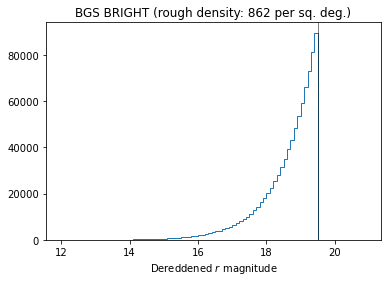

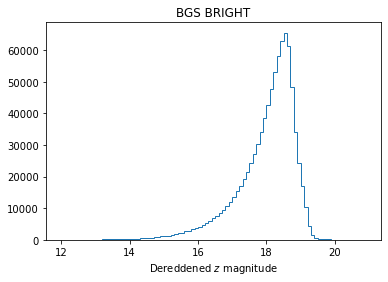

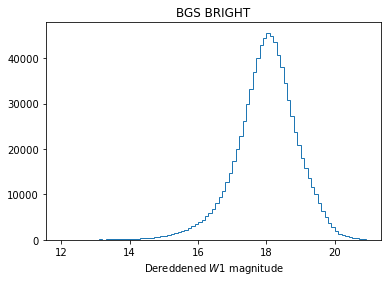

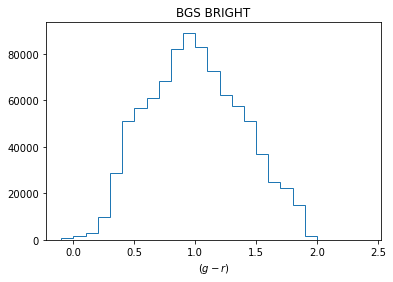

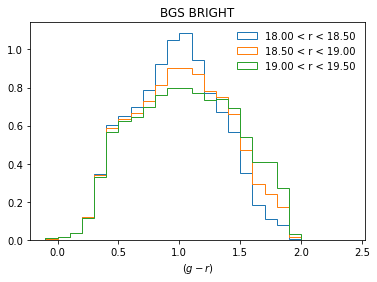

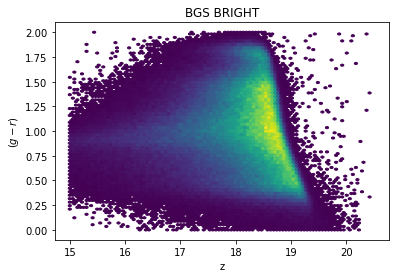

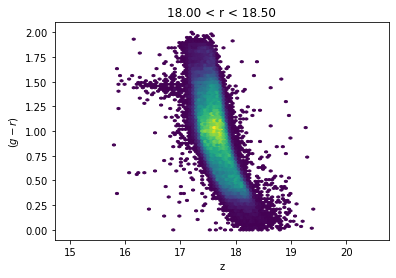

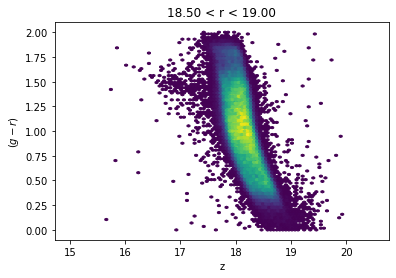

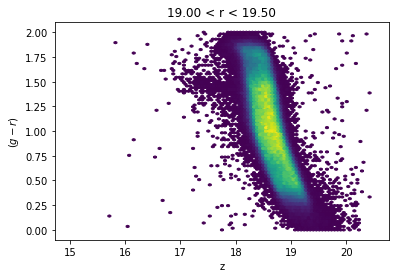

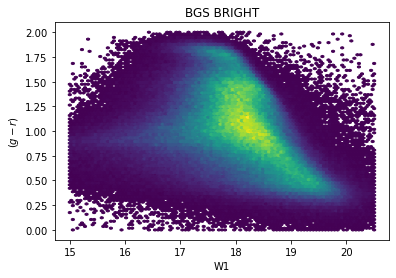

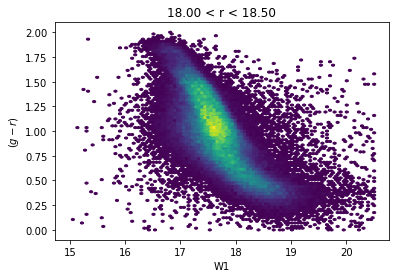

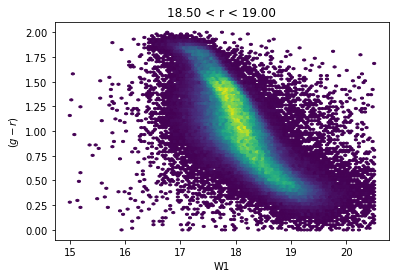

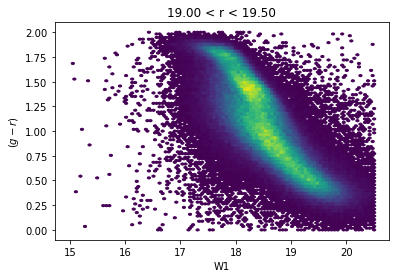

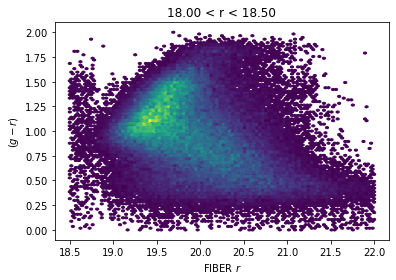

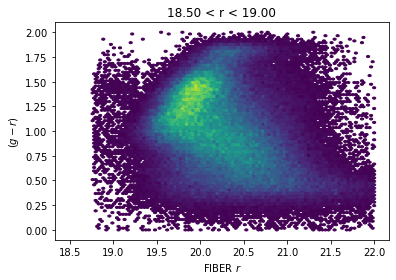

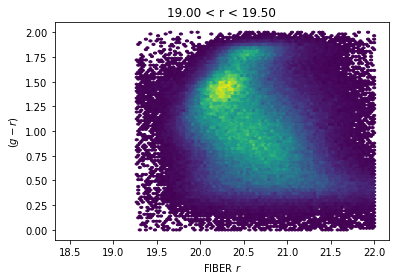

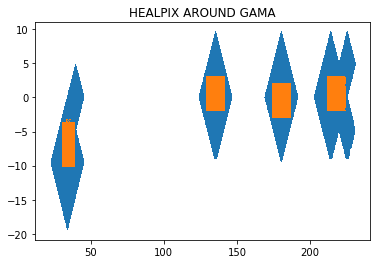

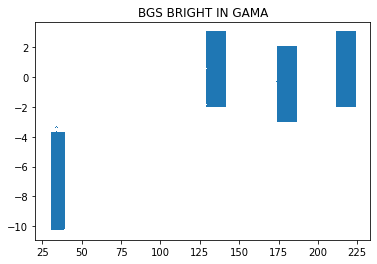

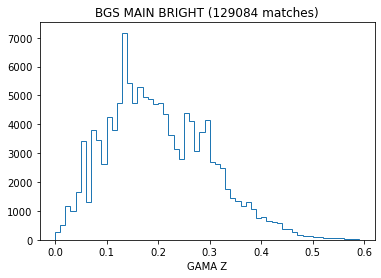

In [301]:
gbrights = target_props(brights, blimits, 'BRIGHT')

<ipython-input-300-59cd11eea07e>:5: RuntimeWarning: divide by zero encountered in log10
  mag_W1   = 22.5 - 2.5 * np.log10(brights['FLUX_W1'] / brights['MW_TRANSMISSION_W1'])
<ipython-input-300-59cd11eea07e>:5: RuntimeWarning: invalid value encountered in log10
  mag_W1   = 22.5 - 2.5 * np.log10(brights['FLUX_W1'] / brights['MW_TRANSMISSION_W1'])


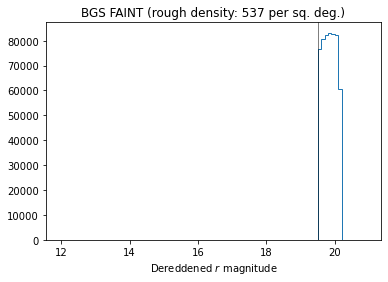

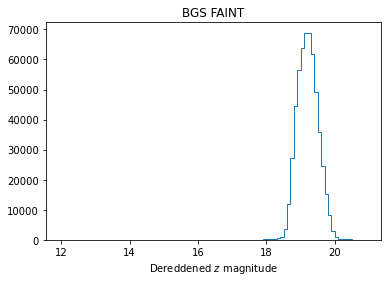

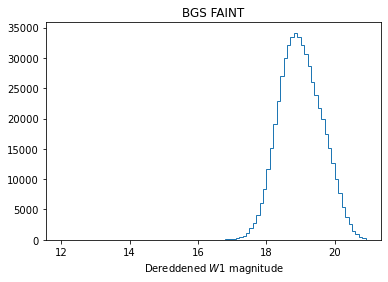

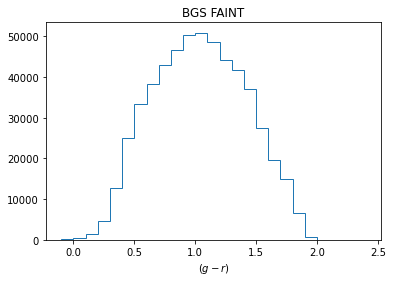

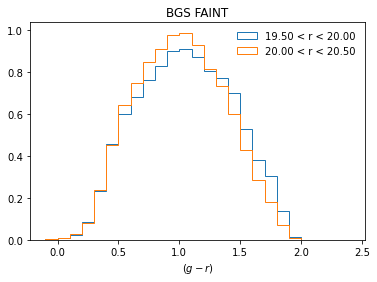

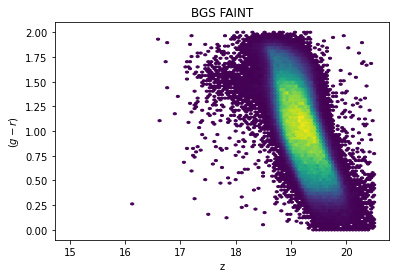

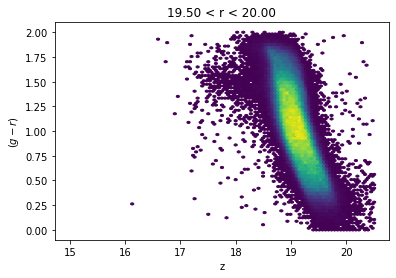

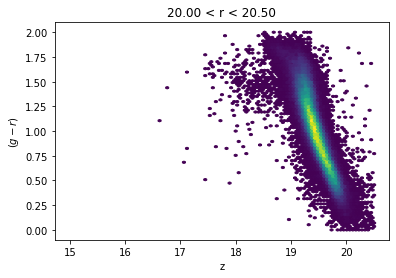

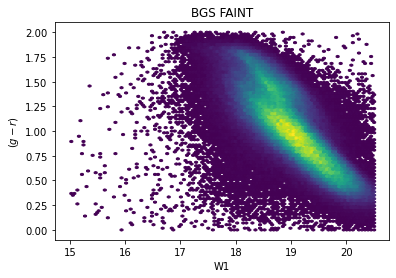

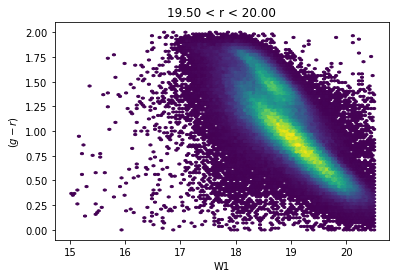

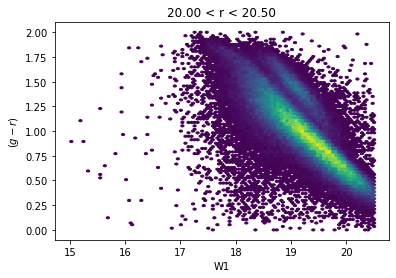

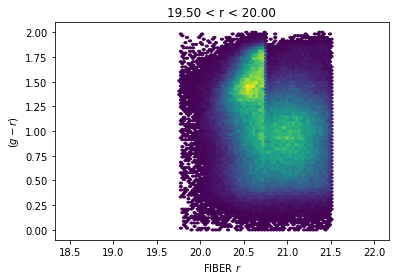

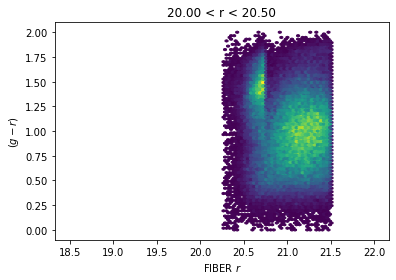

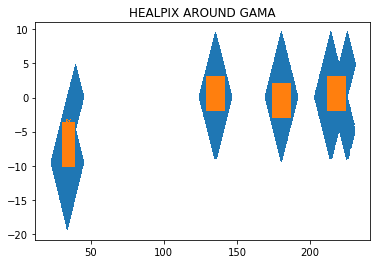

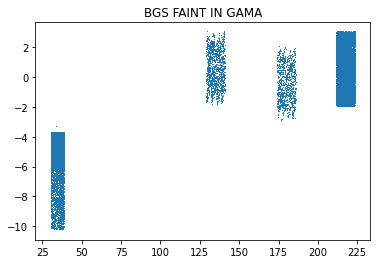

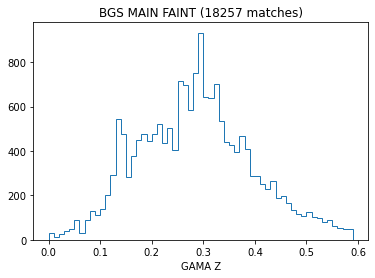

In [302]:
gfaints = target_props(faints, flimits, 'FAINT')

# Done.